In [1]:
import pandas as pd
Iris = pd.read_csv('Iris.csv')
Iris

Id  Sepal_length  Sepal_width  Petal_length  Petal_width         Species
0      1           5.1          3.5           1.4          0.2     Iris-setosa
1      2           4.9          3.0           1.4          0.2     Iris-setosa
2      3           4.7          3.2           1.3          0.2     Iris-setosa
3      4           4.6          3.1           1.5          0.2     Iris-setosa
4      5           5.0          3.6           1.4          0.2     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146           6.7          3.0           5.2          2.3  Iris-virginica
146  147           6.3          2.5           5.0          1.9  Iris-virginica
147  148           6.5          3.0           5.2          2.0  Iris-virginica
148  149           6.2          3.4           5.4          2.3  Iris-virginica
149  150           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 6 columns]

In [2]:
Iris = Iris.drop_duplicates()
Iris.reset_index(drop=True)
s = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
Iris['Species'] = Iris['Species'].map(s)
Iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Petal_length  150 non-null    float64
 4   Petal_width   150 non-null    float64
 5   Species       150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.2 KB


In [3]:
Iris.describe()

Id  Sepal_length  Sepal_width  Petal_length  Petal_width  \
count  150.000000    150.000000   150.000000    150.000000   150.000000   
mean    75.500000      5.843333     3.054000      3.758667     1.198667   
std     43.445368      0.828066     0.433594      1.764420     0.763161   
min      1.000000      4.300000     2.000000      1.000000     0.100000   
25%     38.250000      5.100000     2.800000      1.600000     0.300000   
50%     75.500000      5.800000     3.000000      4.350000     1.300000   
75%    112.750000      6.400000     3.300000      5.100000     1.800000   
max    150.000000      7.900000     4.400000      6.900000     2.500000   

          Species  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

C:\Users\wumin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


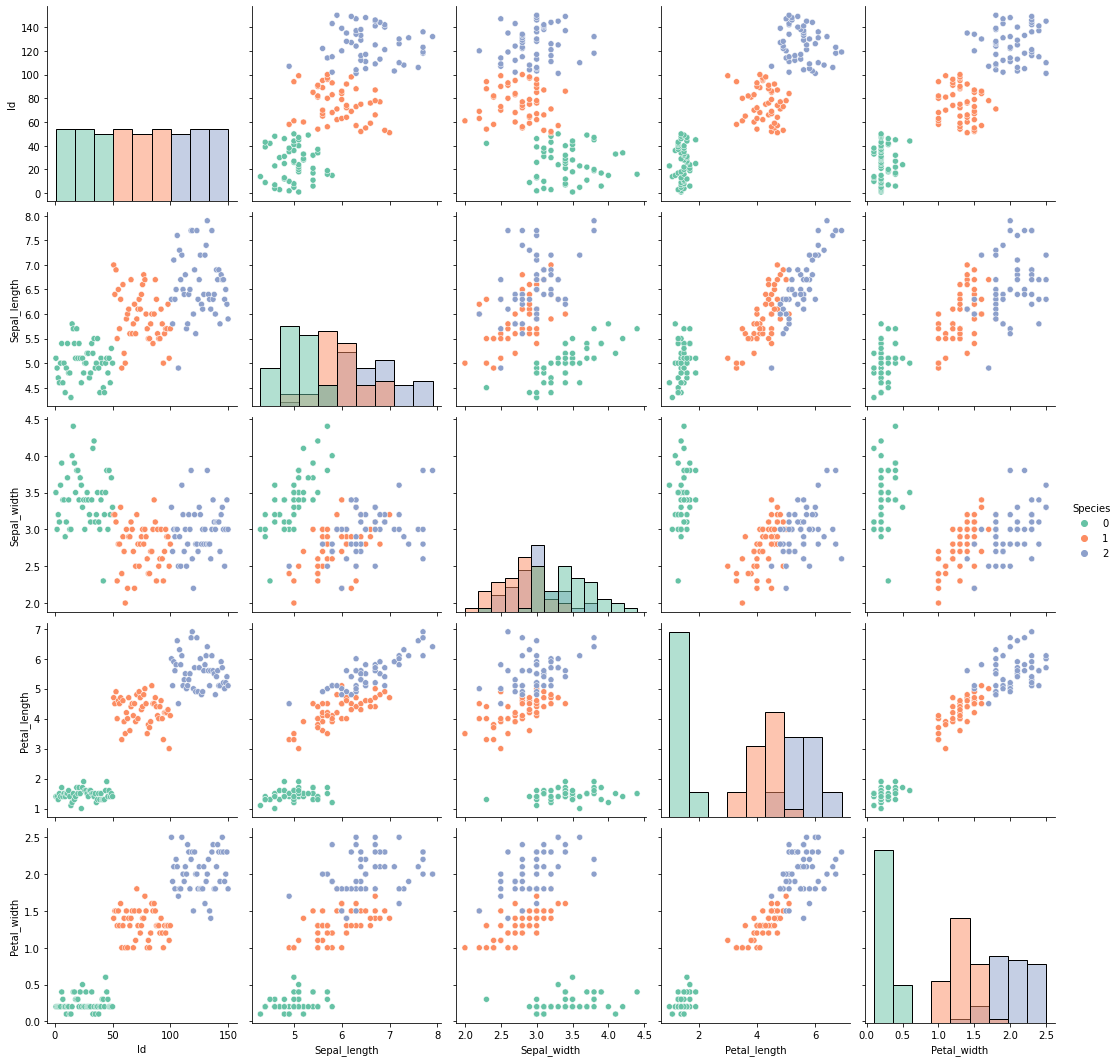

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Iris, hue="Species", size=3, palette="Set2", diag_kind="hist")

C:\Users\wumin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


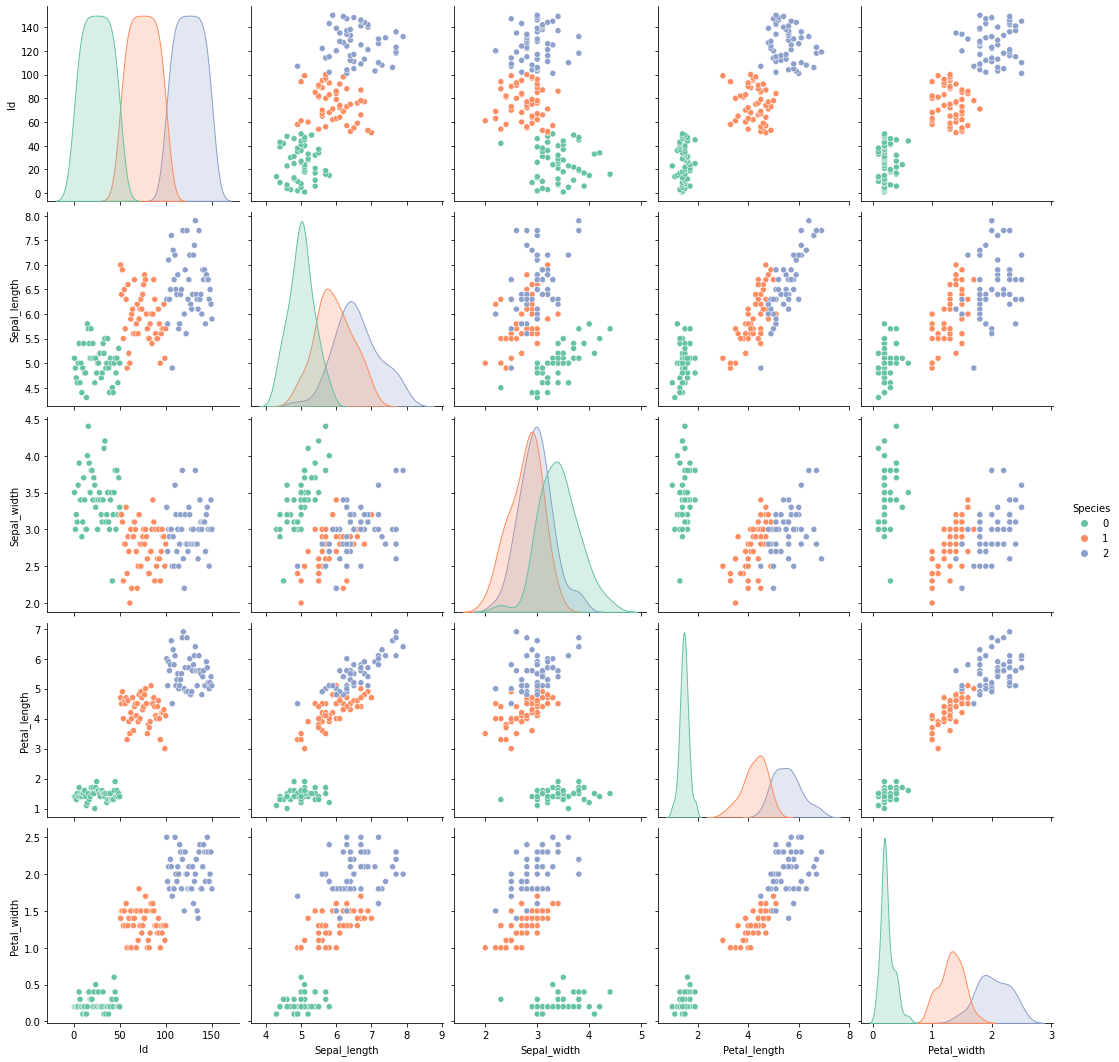

In [5]:
sns.pairplot(Iris, hue="Species", size=3, diag_kind="kde", palette="Set2")

In [6]:
#設定特徵職及標籤
Iris_X = Iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]
Iris_y = Iris['Species']

In [7]:
#分割資料集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Iris_X, Iris_y, test_size = 0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
s = []
for i in range(1,11):
  k = i
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  print('k = ', k, '準確度:', knn.score(X_test, y_test))
  s.append(knn.score(X_test, y_test))

k =  1 準確度: 0.9333333333333333
k =  2 準確度: 0.8666666666666667
k =  3 準確度: 0.9333333333333333
k =  4 準確度: 0.8333333333333334
k =  5 準確度: 0.8333333333333334
k =  6 準確度: 0.8333333333333334
k =  7 準確度: 0.8333333333333334
k =  8 準確度: 0.8333333333333334
k =  9 準確度: 0.8333333333333334
k =  10 準確度: 0.8333333333333334


In [10]:
#建立KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [11]:
#進行訓練
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_test, y_test)

0.8333333333333334

In [13]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print('分類的預測結果:')
pred = knn.predict(Ｘ_test)
pred

分類的預測結果:


array([0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2,
       2, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [15]:
y_test.values

array([0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 0], dtype=int64)

In [16]:
#測試集分類的準確度
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8333333333333334

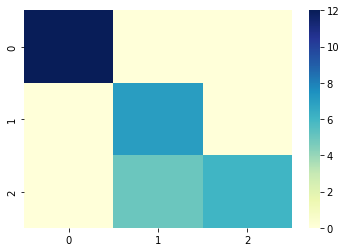

In [17]:
#混淆矩陣
from sklearn.metrics import confusion_matrix
flights = confusion_matrix(y_test, pred)
ax = sns.heatmap(flights, cmap="YlGnBu")

In [18]:
#交叉驗證
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
s = cross_val_score(knn, Iris_X, Iris_y, scoring='accuracy', cv=10)
print('交叉驗證每次的準確率:', s)
print('交叉驗證得到的平均值:', s.mean())
predict = cross_val_predict(estimator = knn, X = Iris_X, y = Iris_y, cv = 10)
print("Classification Report: \n",classification_report(Iris_y, predict))

交叉驗證每次的準確率: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
交叉驗證得到的平均值: 0.9666666666666668
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [19]:
#進行分類預測
new = [[6.6,3.1,5.2,2.4]]
v = knn.predict(new)
if v==0:
  s = 'setosa'
elif v==1:
  s = 'versicolor'
elif v==2:
  s = 'virginica'
else:
  s = '錯誤'
print('預測結過為:', s)

預測結過為: virginica


C:\Users\wumin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
#決策樹
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier

In [21]:
X_cols = Iris.columns.drop('Species')
X = Iris[X_cols]
y = Iris['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
model_tree = DecisionTreeClassifier(max_depth=10)
model_tree.fit(X_train, y_train)
pd.Series(model_tree.feature_importances_,index=X.columns).sort_values(ascending=False).head()

Id              0.506176
Petal_width     0.493824
Sepal_length    0.000000
Sepal_width     0.000000
Petal_length    0.000000
dtype: float64

In [23]:
features = X.columns
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
dot_data = export_graphviz(model_tree, out_file=None,
                  feature_names=features,
                  class_names = class_names,
                  proportion = False,
                  max_depth=3,
                  filled=True,
                  rounded=True)

In [24]:
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tumor.png')
Image(graph[0].create_png(), width=800)

FileNotFoundError: [WinError 2] "dot" not found in path.